In [1]:
import pandas as pd
import numpy as np
import glob

/Users/jq279/.local/lib/python3.9/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.7.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
/Users/jq279/.local/lib/python3.9/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.2' currently installed).
  from pandas.core import (


In [2]:
path='/Users/jq279/capstone/data/pecan_street/15_min/all_data'
pattern_meta = f"{path}/*meta*.csv"  # Pattern to match filenames containing "meta"
pattern_load = f"{path}/*15minute*.csv" # List of files matching the pattern
files_meta = glob.glob(pattern_meta)
files_load = glob.glob(pattern_load)

# Read each file into a DataFrame and store it in a list
dfs_meta = [pd.read_csv(file) for file in files_meta]
dfs_load = [pd.read_csv(file) for file in files_load]

# Concatenate all DataFrames in the list into a single DataFrame
df_meta = pd.concat(dfs_meta, ignore_index=True)
df_load = pd.concat(dfs_load, ignore_index=True)

In [100]:
df_load.head()

,dataid,local_15min,air1,air2,air3,airwindowunit1,aquarium1,bathroom1,bathroom2,bedroom1,...,sumppump1,utilityroom1,venthood1,waterheater1,waterheater2,wellpump1,winecooler1,leg1v,leg2v,solar_total
0,3687,2014-01-01 00:00:00-06,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,120.239,119.769,NaN
1,3687,2014-01-01 00:15:00-06,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,120.256,119.628,NaN
2,3687,2014-01-01 00:30:00-06,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,120.358,119.859,NaN
3,3687,2014-01-01 00:45:00-06,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,120.766,119.985,NaN
4,3687,2014-01-01 01:00:00-06,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,120.844,120.368,NaN


In [56]:
df_load.columns

Index(['dataid', 'local_15min', 'air1', 'air2', 'air3', 'airwindowunit1',
       'aquarium1', 'bathroom1', 'bathroom2', 'bedroom1', 'bedroom2',
       'bedroom3', 'bedroom4', 'bedroom5', 'battery1', 'car1', 'car2',
       'circpump1', 'clotheswasher1', 'clotheswasher_dryg1', 'diningroom1',
       'diningroom2', 'dishwasher1', 'disposal1', 'drye1', 'dryg1', 'freezer1',
       'furnace1', 'furnace2', 'garage1', 'garage2', 'grid', 'heater1',
       'heater2', 'heater3', 'housefan1', 'icemaker1', 'jacuzzi1', 'kitchen1',
       'kitchen2', 'kitchenapp1', 'kitchenapp2', 'lights_plugs1',
       'lights_plugs2', 'lights_plugs3', 'lights_plugs4', 'lights_plugs5',
       'lights_plugs6', 'livingroom1', 'livingroom2', 'microwave1', 'office1',
       'outsidelights_plugs1', 'outsidelights_plugs2', 'oven1', 'oven2',
       'pool1', 'pool2', 'poollight1', 'poolpump1', 'pump1', 'range1',
       'refrigerator1', 'refrigerator2', 'security1', 'sewerpump1', 'shed1',
       'solar', 'solar2', 'sprinkler1

In [57]:
df_load.groupby('dataid')['grid'].count()

dataid
27      17663
142     17664
203     35036
387     17664
558     17664
        ...  
9278    32555
9612    35036
9775    35132
9836    34364
9922    33544
Name: grid, Length: 73, dtype: int64

In [58]:
# find same number of households with and without solar
id_load=df_load.dataid.drop_duplicates().tolist()
id_load_str_list = [str(i) for i in id_load]
meta=df_meta[df_meta.dataid.isin(id_load_str_list)]

In [59]:
meta['has_pv'] = np.where((meta['solar'] == 'yes')|(meta['solar2']== 'yes'), 'yes', 'no')

/var/folders/nw/mcnt68y90w95hyv4qnvmt2wm0000gn/T/ipykernel_46843/2885737417.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  meta['has_pv'] = np.where((meta['solar'] == 'yes')|(meta['solar2']== 'yes'), 'yes', 'no')


In [60]:
yes_count = meta['has_pv'].value_counts().get('yes', 0)
no_count = meta['has_pv'].value_counts().get('no', 0)

In [61]:
excess = abs(yes_count - no_count) 
value_to_remove = 'yes' if yes_count > no_count else 'no'

In [62]:
if excess > 0:
    indices_to_remove = meta.index[meta['has_pv'] == value_to_remove].tolist()[:excess]
    meta_equal = meta.drop(indices_to_remove)

In [63]:
meta_equal['has_pv'].value_counts()

has_pv
no     34
yes    34
Name: count, dtype: int64

In [64]:
df_load['solar_total']=df_load['solar'].fillna(0)+df_load['solar2'].fillna(0)
both_nan = df_load['solar'].isna() & df_load['solar2'].isna()
df_load.loc[both_nan, 'solar_total'] = np.nan


In [66]:
df_load_test=df_load[['dataid','local_15min','solar_total','grid']]
df_load_test=df_load_test.sort_values(by=['dataid','local_15min'])

In [ ]:
# select the households for testing
id_list=meta_equal['dataid'].astype('int')
df_load_test_final=df_load_test[df_load_test.dataid.isin(id_list)]

In [67]:
df_load_test_final.dataid.drop_duplicates()

0          3687
35036      6377
70072      7062
140144     9213
175180      203
           ... 
1678890      27
1678906     142
1678910     914
1678918    2096
1679226    1240
Name: dataid, Length: 68, dtype: int64

In [49]:
#df_load_test_final.to_csv('15min_pecan_34pv_34nonpv.csv')
#meta_equal.to_csv('meta_pecan_34pv_34nonpv.csv')

In [164]:
# check missing values 
df_check=pd.read_csv('/Users/jq279/capstone/pecan/15min_pecan_34pv_34nonpv.csv')
df_meta_check=pd.read_csv('/Users/jq279/capstone/pecan/meta_pecan_34pv_34nonpv.csv')

In [165]:
# check missing values
df_count_missing_NL=df_check.groupby('dataid')['grid'].apply(lambda x: x.isna().sum()).reset_index()
df_count_missing_PV=df_check.groupby('dataid')['solar_total'].apply(lambda x: x.isna().sum()).reset_index()
df_count_missing_PV=df_count_missing_PV.merge(meta[['dataid','has_pv']],how='inner',on='dataid')

df_count_missing_NL.rename(columns={'grid': 'grid_missing'}, inplace=True)
df_count_missing_PV.rename(columns={'solar_total': 'solar_missing'}, inplace=True)

df_count_missing_PV



#df_count_missing=df_count_missing_NL.merge(df_count_missing_PV,on='dataid')
#df_count_missing.to_csv('chek.csv')


,dataid,solar_missing,has_pv
0,27,0,yes
1,142,0,yes
2,203,35036,no
3,387,0,yes
4,558,17664,no
...,...,...,...
63,9278,2480,yes
64,9612,35036,no
65,9775,35132,no
66,9836,0,yes


<AxesSubplot:>

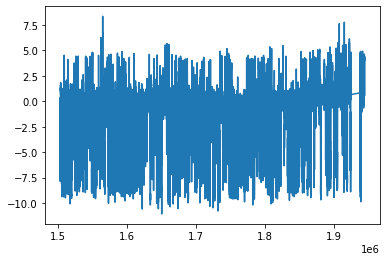

In [166]:
#check household 914
df_27=df_check.loc[df_check['dataid']==27,]
df_27.grid.plot()

In [181]:
start_dates = df_check.groupby('dataid')['local_15min'].min().reset_index()
end_dates = df_check.groupby('dataid')['local_15min'].max().reset_index()

In [182]:
date_range=start_dates.merge(end_dates,how='inner',on='dataid')

In [183]:
date_range.head()

,dataid,local_15min_x,local_15min_y
0,27,2019-05-01 00:00:00-05,2019-10-31 23:45:00-05
1,142,2019-05-01 00:00:00-05,2019-10-31 23:45:00-05
2,203,2015-01-01 00:00:00-06,2015-12-31 23:45:00-06
3,387,2019-05-01 00:00:00-05,2019-10-31 23:45:00-05
4,558,2019-05-01 00:00:00-05,2019-10-31 23:45:00-05


In [184]:
date_range.columns=['dataid','local_15min_start_date','local_15min_end_date']

In [185]:
date_range['local_15min_start_date']

0     2019-05-01 00:00:00-05
1     2019-05-01 00:00:00-05
2     2015-01-01 00:00:00-06
3     2019-05-01 00:00:00-05
4     2019-05-01 00:00:00-05
               ...          
63    2018-01-01 00:00:00-06
64    2014-03-01 00:00:00-06
65    2016-01-01 00:00:00-06
66    2014-07-08 00:00:00-05
67    2018-01-01 00:00:00-06
Name: local_15min_start_date, Length: 68, dtype: object

In [186]:
# Ensure the dates are in datetime format, including timezone
date_range['local_15min_start_date'] = pd.to_datetime(date_range['local_15min_start_date'], utc=True)
date_range['local_15min_end_date'] = pd.to_datetime(date_range['local_15min_end_date'], utc=True)

# Calculate the number of days between the start and end dates
date_range['days_in_between'] = (date_range['local_15min_end_date'] - date_range['local_15min_start_date']).dt.days +1
date_range['intervals_full'] =date_range['days_in_between']*96

In [187]:
df_count_NL=df_check.groupby('dataid')['grid'].count().reset_index()
df_count_PV=df_check.groupby('dataid')['solar_total'].count().reset_index()

df_count_NL.rename(columns={'grid': 'grid_total_record'}, inplace=True)
df_count_PV.rename(columns={'solar_total': 'grid_total_record'}, inplace=True)

In [174]:
meta_info_needed=meta[['dataid','city','state']]

In [188]:
from functools import reduce
# List of DataFrames to merge
dfs = [date_range, df_count_NL, df_count_PV,df_count_missing_NL ,df_count_missing_PV,meta_info_needed]

# Use reduce to merge all DataFrames on the 'key' column
merged_df = reduce(lambda left, right: pd.merge(left, right, on='dataid', how='inner'), dfs)


In [189]:
merged_df

,dataid,local_15min_start_date,local_15min_end_date,days_in_between,intervals_full,grid_total_record_x,grid_total_record_y,grid_missing,solar_missing,has_pv,city,state
0,27,2019-05-01 05:00:00+00:00,2019-11-01 04:45:00+00:00,184,17664,17663,17663,0,0,yes,Brooktondale,New York
1,142,2019-05-01 05:00:00+00:00,2019-11-01 04:45:00+00:00,184,17664,17664,17664,0,0,yes,Trumansburg,New York
2,203,2015-01-01 06:00:00+00:00,2016-01-01 05:45:00+00:00,365,35040,35036,0,0,35036,no,San Diego,California
3,387,2019-05-01 05:00:00+00:00,2019-11-01 04:45:00+00:00,184,17664,17664,17664,0,0,yes,Ithaca,New York
4,558,2019-05-01 05:00:00+00:00,2019-11-01 04:45:00+00:00,184,17664,17664,0,0,17664,no,Ithaca,New York
...,...,...,...,...,...,...,...,...,...,...,...,...
63,9278,2018-01-01 06:00:00+00:00,2019-01-01 05:45:00+00:00,365,35040,32555,32555,2480,2480,yes,Austin,Texas
64,9612,2014-03-01 06:00:00+00:00,2015-03-01 05:45:00+00:00,365,35040,35036,0,0,35036,no,San Diego,California
65,9775,2016-01-01 06:00:00+00:00,2017-01-01 05:45:00+00:00,366,35136,35132,0,0,35132,no,San Diego,California
66,9836,2014-07-08 05:00:00+00:00,2015-07-01 04:45:00+00:00,358,34368,34364,34364,0,0,yes,San Diego,California


In [190]:
merged_df.to_csv('missing_data_check.csv')